In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [43]:
computer=pd.read_csv('C:/Users/User-PC/Desktop/Data Science/Data Science Assignment/6 MLR/Computer_Data (1).csv')
computer

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,35


In [3]:
computer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6259 non-null   int64 
 1   price       6259 non-null   int64 
 2   speed       6259 non-null   int64 
 3   hd          6259 non-null   int64 
 4   ram         6259 non-null   int64 
 5   screen      6259 non-null   int64 
 6   cd          6259 non-null   object
 7   multi       6259 non-null   object
 8   premium     6259 non-null   object
 9   ads         6259 non-null   int64 
 10  trend       6259 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


In [4]:
computer.describe()

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [5]:
computer.corr()

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend
Unnamed: 0,1.000000,-0.199924,0.388566,0.555492,0.265376,0.184699,-0.272714,0.989818
price,-0.199924,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.388566,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.555492,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.265376,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.184699,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,-0.272714,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,0.989818,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


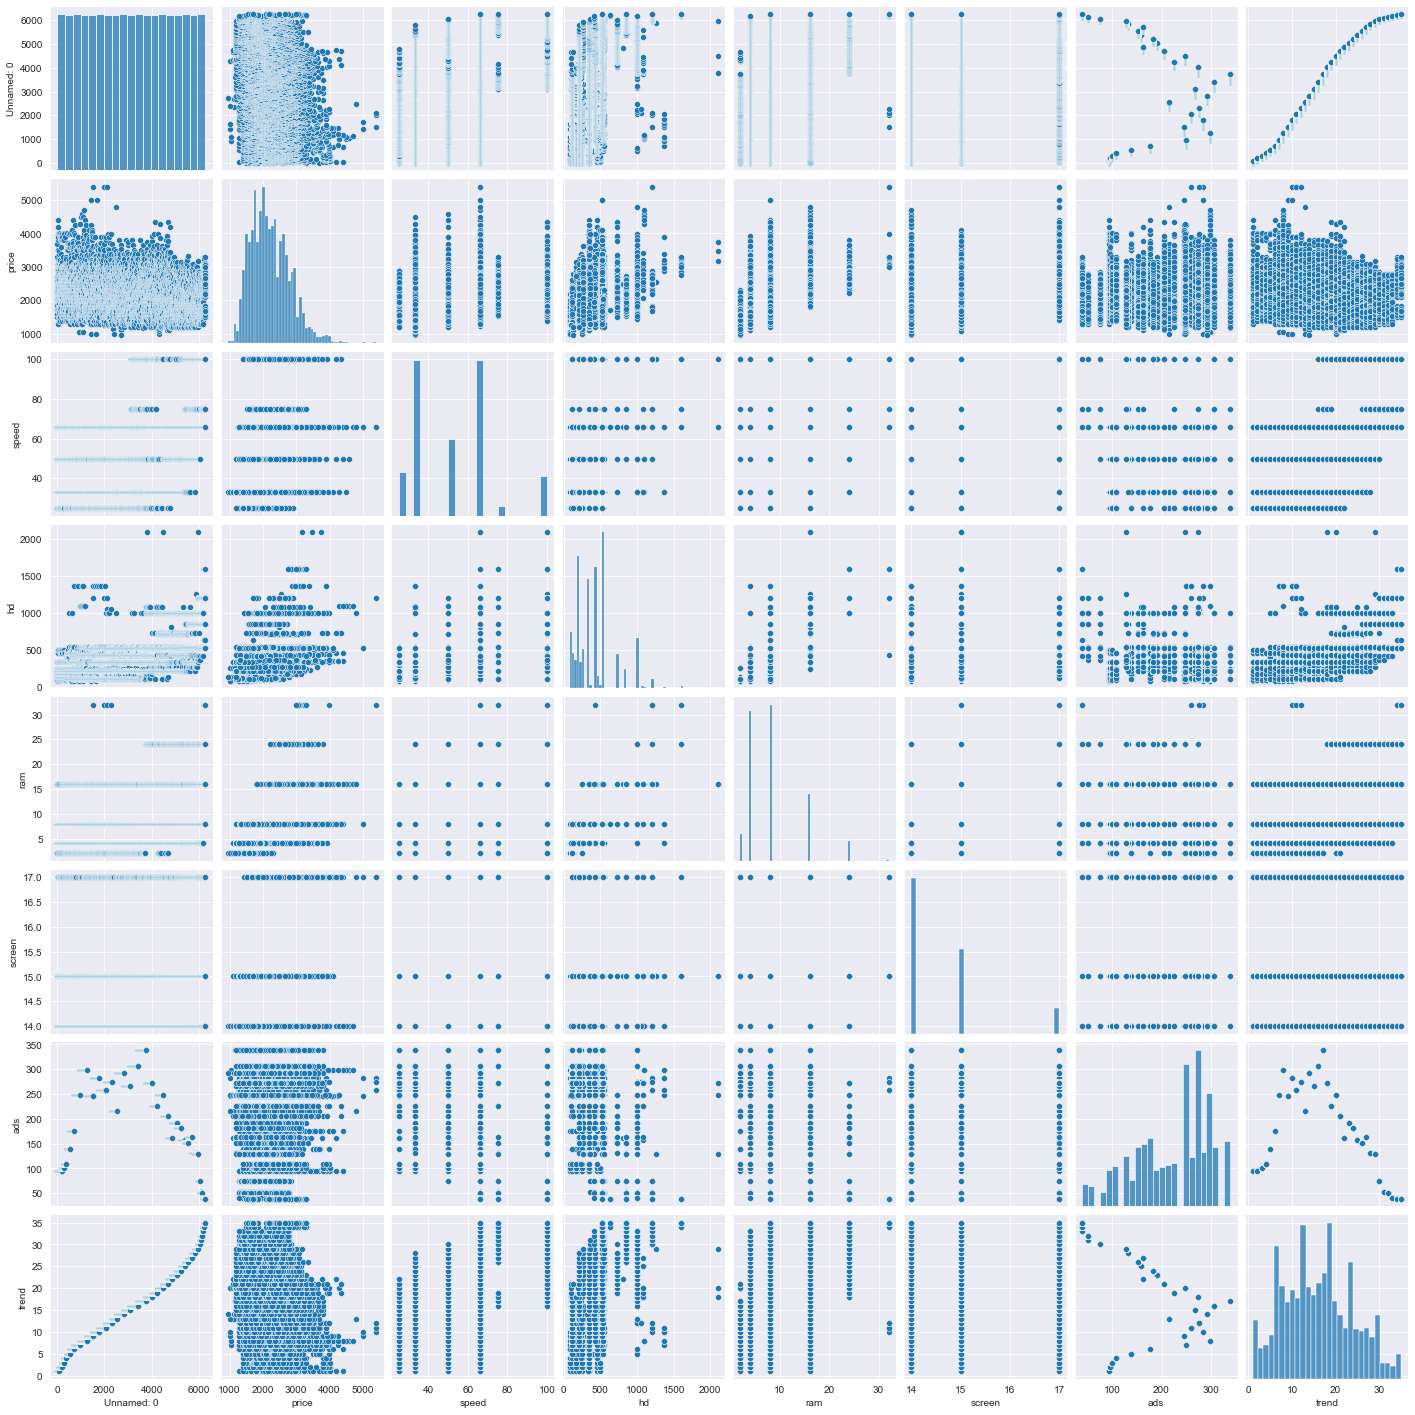

In [44]:
sns.set_style(style='darkgrid')
sns.pairplot(computer)

<AxesSubplot:>

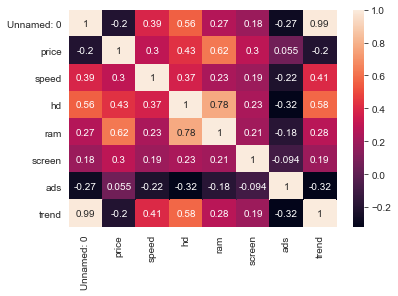

In [46]:
# Viewing the heatmap
sns.heatmap(computer.corr(), annot=True)

In [47]:
## first model

model=smf.ols("price~speed+hd+ram+screen+cd+multi+premium+ads+trend",data=computer).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2399.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:27:16   Log-Likelihood:                -44039.
No. Observations:                6259   AIC:                         8.810e+04
Df Residuals:                    6249   BIC:                         8.817e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        307.9880     60.353      5.103      0.000     189.675     426.301
cd[T.yes]         60.9167      9.516      6.402      0.000      42.263      79.571
multi[T.yes]     104.3238     11.413      9.141      0.000      81.951     126.697
premium[T.yes]  -509.2247     12.342    -41.259      0.000    -533.420    -485.030
speed              9.3203      0.185     50.364      0.000       8.958       9.683
hd                 0.7818      0.028     28.311      0.000       0.728       0.836
ram               48.2560      1.066     45.265      0.000      46.166      50.346
screen           123.0890      3.999     30.776      0.000     115.249     130.929
ads                0.6573      0.051     12.809      0.000       0.557       0.758
trend            -51.8496      0.629    -82.470      0.000     -53.082     -50.617
==============================================================================
Omnibus:                     1014.821   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3190.887
Skew:                           0.832   Prob(JB):                         0.00
Kurtosis:                       6.077   Cond. No.                     9.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept          5.103075
 cd[T.yes]          6.401777
 multi[T.yes]       9.141046
 premium[T.yes]   -41.258651
 speed             50.364369
 hd                28.310833
 ram               45.264805
 screen            30.776135
 ads               12.808936
 trend            -82.470245
 dtype: float64,
 Intercept         0.0
 cd[T.yes]         0.0
 multi[T.yes]      0.0
 premium[T.yes]    0.0
 speed             0.0
 hd                0.0
 ram               0.0
 screen            0.0
 ads               0.0
 trend             0.0
 dtype: float64)

In [9]:
##Finding rsquared values
model.rsquared , model.rsquared_adj  # Model accuracy is 77.5%

(0.7755675832117539, 0.7752443488140752)

# Model Validation

# 1. Colinearity Check

In [10]:
# calculating VIF's values of independent variables  (VIF value best around 2.5 to 10. Higher multicolinearity calls for higher VIF but not too high)
## ommiting cd,multi, premium.
rsq_speed = smf.ols('speed~hd+ram+screen+cd+multi+premium+ads+trend', data=computer).fit().rsquared  
vif_speed = 1/(1-rsq_speed) 
vif_speed

1.2653637174997177

In [11]:
rsq_hd = smf.ols('hd~speed+ram+screen+cd+multi+premium+ads+trend', data=computer).fit().rsquared  
vif_hd = 1/(1-rsq_hd) 
vif_hd

4.207394801604396

In [12]:
rsq_ram = smf.ols('ram~speed+hd+screen+cd+multi+premium+ads+trend', data=computer).fit().rsquared  
vif_ram = 1/(1-rsq_ram) 
vif_ram

2.9746283364519175

In [13]:
rsq_screen = smf.ols('screen~speed+hd+ram+cd+multi+premium+ads+trend', data=computer).fit().rsquared  
vif_screen = 1/(1-rsq_screen) 
vif_screen

1.0816435677723717

In [15]:
rsq_ads = smf.ols('ads~speed+hd+ram+screen+multi+premium+cd+trend', data=computer).fit().rsquared  
vif_ads = 1/(1-rsq_ads) 
vif_ads

1.217217828499603

In [16]:
rsq_trend = smf.ols('trend~speed+hd+ram+screen+multi+premium+cd+ads', data=computer).fit().rsquared  
vif_trend = 1/(1-rsq_trend) 
vif_trend

2.022789919481578

In [17]:
# Storing vif values in a data frame  ##Variance inflation factor. Measure of Multi-Colinearity
computer = {'Variables':['speed','hd','ram','screen','ads','trend'],'VIF':[vif_speed,vif_hd,vif_ram,vif_screen,vif_ads,vif_trend]}
Vif_frame = pd.DataFrame(computer)  
Vif_frame

,Variables,VIF
0,speed,1.265364
1,hd,4.207395
2,ram,2.974628
3,screen,1.081644
4,ads,1.217218
5,trend,2.022790


# Model Validation

# Residual Analysis

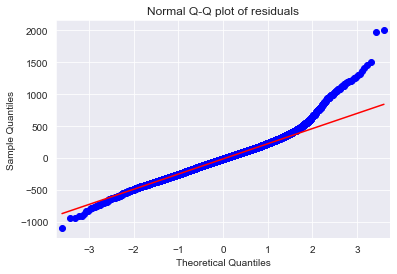

In [18]:
# Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
# User defined z = (x - mu)/sigma
def standard_values(vals) : return (vals-vals.mean())/vals.std()

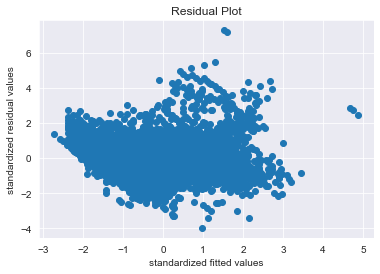

In [20]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

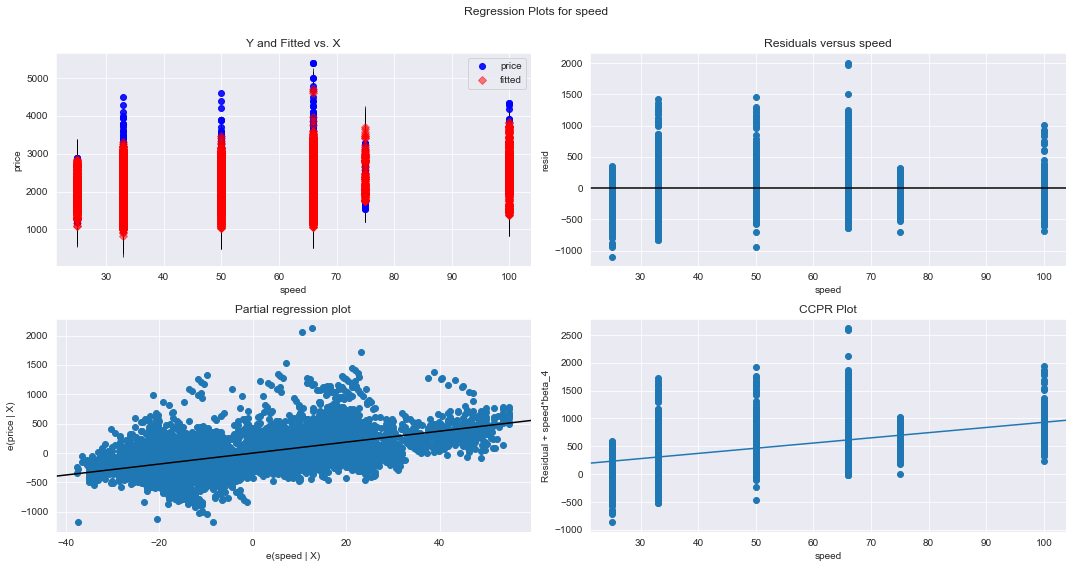

In [21]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'speed',fig=fig)
plt.show()

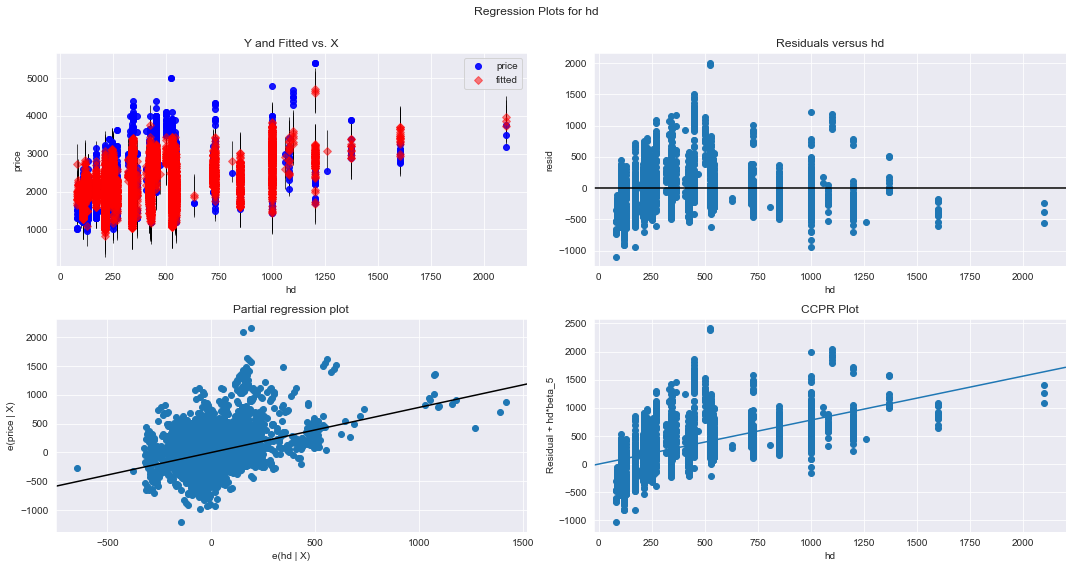

In [22]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'hd',fig=fig)
plt.show()

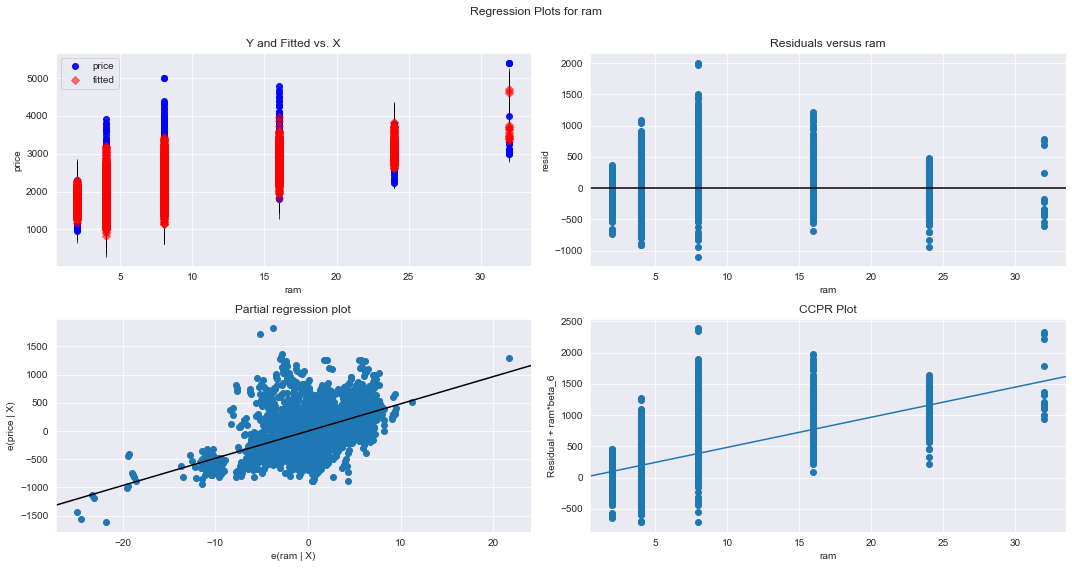

In [23]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ram',fig=fig)
plt.show()

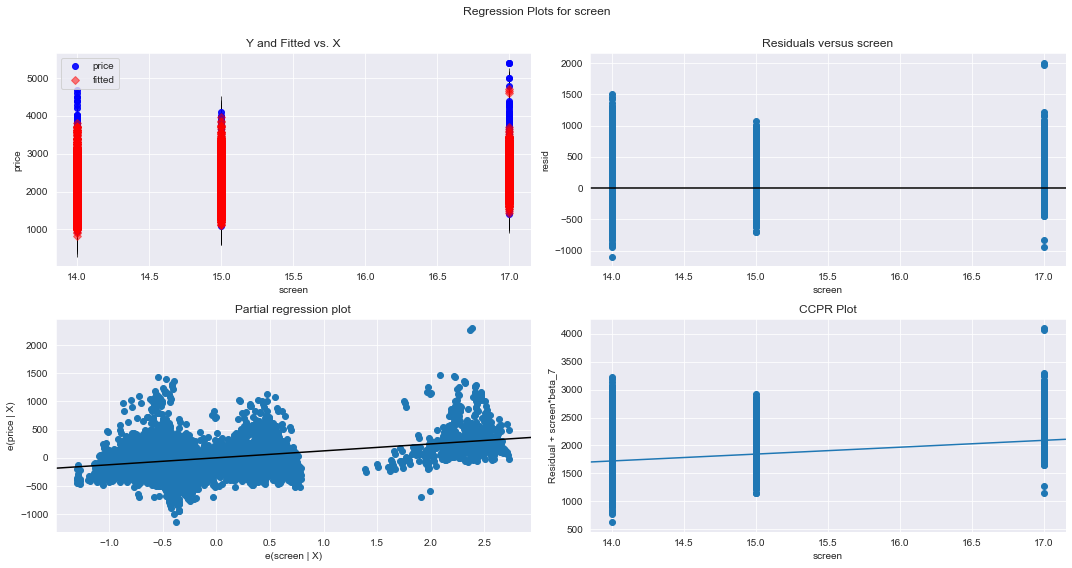

In [25]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'screen',fig=fig)
plt.show()

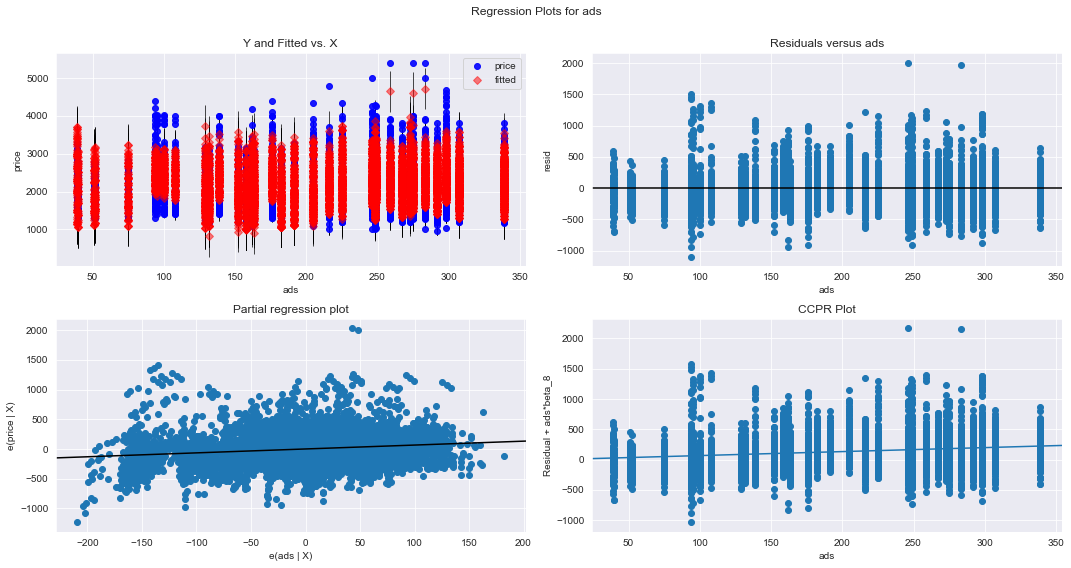

In [26]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ads',fig=fig)
plt.show()

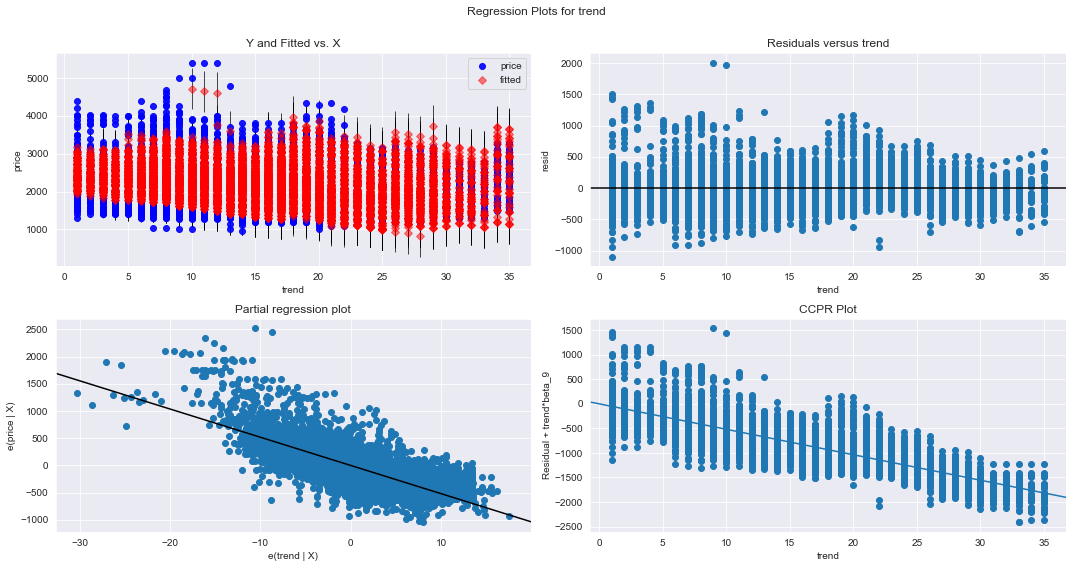

In [27]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'trend',fig=fig)
plt.show()

In [48]:
## second model without cd,multi,premium

model2=smf.ols("price~speed+hd+ram+screen+ads+trend",data=computer).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2580.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:30:18   Log-Likelihood:                -44817.
No. Observations:                6259   AIC:                         8.965e+04
Df Residuals:                    6252   BIC:                         8.969e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -246.6755     66.371     -3.717      0.000    -376.785    -116.566
speed          8.8939      0.209     42.590      0.000       8.485       9.303
hd             0.7088      0.031     22.932      0.000       0.648       0.769
ram           47.3870      1.188     39.899      0.000      45.059      49.715
screen       126.7024      4.521     28.022      0.000     117.839     135.566
ads            0.9697      0.057     17.099      0.000       0.859       1.081
trend        -47.0820      0.676    -69.660      0.000     -48.407     -45.757
==============================================================================
Omnibus:                     1407.073   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3902.981
Skew:                           1.187   Prob(JB):                         0.00
Kurtosis:                       6.054   Cond. No.                     8.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
### Splitting the data into train and test data 

from sklearn.model_selection import train_test_split
comp_train, comp_test  = train_test_split(computer, test_size = 0.2) # 30% test data


In [53]:
# preparing the model on train data 
model_train = smf.ols("price~speed+hd+ram+screen+ads+trend", data = comp_train).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     2077.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:33:35   Log-Likelihood:                -35810.
No. Observations:                5007   AIC:                         7.163e+04
Df Residuals:                    5000   BIC:                         7.168e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -256.5519     73.183     -3.506      0.000    -400.023    -113.080
speed          8.8482      0.232     38.079      0.000       8.393       9.304
hd             0.7176      0.035     20.390      0.000       0.649       0.787
ram           47.1242      1.335     35.306      0.000      44.508      49.741
screen       126.4769      4.983     25.380      0.000     116.707     136.246
ads            1.0209      0.064     16.077      0.000       0.896       1.145
trend        -46.8727      0.761    -61.582      0.000     -48.365     -45.380
==============================================================================
Omnibus:                     1129.260   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3214.012
Skew:                           1.179   Prob(JB):                         0.00
Kurtosis:                       6.138   Cond. No.                     8.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# train_data prediction
train_pred = model_train.predict(comp_train)
train_pred

4462    2169.737942
787     2353.197560
182     2013.181510
1324    2674.856223
3832    1862.099586
           ...     
498     2055.725981
4164    2278.134245
4095    1610.911343
671     3124.594108
5626    2026.293919
Length: 5007, dtype: float64

In [58]:
# train residual values 
train_resid  = train_pred - comp_train.price
train_resid

4462   -174.262058
787     -40.802440
182     114.181510
1324   -123.143777
3832    267.099586
           ...    
498    -134.274019
4164   -165.865755
4095     61.911343
671     125.594108
5626    331.293919
Length: 5007, dtype: float64

In [60]:
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse


308.90995293656977

In [62]:
# preparing the model on test data 
model_test = smf.ols("price~speed+hd+ram+screen+ads+trend", data = comp_test).fit()
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     503.4
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:37:25   Log-Likelihood:                -9003.2
No. Observations:                1252   AIC:                         1.802e+04
Df Residuals:                    1245   BIC:                         1.806e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -202.4308    157.292     -1.287      0.198    -511.017     106.155
speed          9.0899      0.478     19.012      0.000       8.152      10.028
hd             0.6804      0.065     10.456      0.000       0.553       0.808
ram           48.1788      2.636     18.275      0.000      43.007      53.351
screen       126.8011     10.739     11.807      0.000     105.732     147.871
ads            0.7847      0.126      6.203      0.000       0.537       1.033
trend        -47.8604      1.482    -32.287      0.000     -50.769     -44.952
==============================================================================
Omnibus:                      283.279   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              695.522
Skew:                           1.207   Prob(JB):                    9.32e-152
Kurtosis:                       5.740   Cond. No.                     9.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
# prediction on test data set 
test_pred = model_test.predict(comp_test)
test_pred

469     2768.133041
5910    1373.661187
2438    2395.321412
597     2767.240769
5240    1135.830519
           ...     
3400    2851.710645
268     3026.536347
2770    2010.428589
2969    1701.328177
4507    1665.481360
Length: 1252, dtype: float64

In [66]:
# test residual values 
test_resid  = test_pred - comp_test.price
test_resid

469    -951.866959
5910   -716.338813
2438   -348.678588
597    -131.759231
5240    -63.169481
           ...    
3400   -545.289355
268     227.536347
2770    215.428589
2969    142.328177
4507    -82.518640
Length: 1252, dtype: float64

In [67]:
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid*test_resid)) 
test_rmse


321.21840743767484